# Modules import

In [1]:
import pandas as pd

In [4]:
# to describe dataset
!pip install skimpy
from skimpy import skim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 93.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 72.2 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 6.17.1
    Uninstalling ipykernel-6.17.1:
      Successfully uninstalled ipykernel-6.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==6.17.1, but you have ipykernel 6.29.5 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatibl

In [12]:
# to standardize numerical features
from sklearn.preprocessing import StandardScaler

In [24]:
# to viz
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
# to compute non-linear correlation
from sklearn.feature_selection import mutual_info_regression

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
# to evaluate models
from sklearn.metrics import mean_squared_error

In [31]:
# to model with cross val
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

In [41]:
import numpy as np

# Read dataset

In [2]:
url = "https://proai-datasets.s3.eu-west-3.amazonaws.com/housing.csv"

In [8]:
df = pd.read_csv(url)

In [9]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


# EDA

## Quick sight

In [10]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 545    │ │ int64       │ 13    │                                                          │
│ │ Number of columns │ 13     │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column         ┃ NA ┃ NA % ┃ mean    ┃ sd      ┃ p0      ┃ p25     ┃ p50     ┃ p75     ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ price          │  0 │    0 │ 4767000 │ 1870000 │ 1750000 │ 3430000 │ 4340000 │ 5740000 │ 13300000 │  ▆█▄▁  │  │
│ │ area           │  0 │    0 │    5151 │    2170 │    1650 │    3600 │    4600 │    6360 │    16200 │  █▇▃▁  │  │
│ │ bedrooms       │  0 │    0 │   2.965 │  0.7381 │       1 │       2 │       3 │       3 │        6 │   ▄█▃  │  │
│ │ bathrooms      │  0 │    0 │   1.286 │  0.5025 │       1 │       1 │       1 │       2 │        4 │  █ ▃   │  │
│ │ stories        │  0 │    0 │   1.806 │  0.8675 │       1 │       1 │       2 │       2 │        4 │ █ █ ▁▁ │  │
│ │ mainroad       │  0 │    0 │  0.8587 │  0.3486 │       0 │       1 │       1 │       1 │        1 │ ▁    █ │  │
│ │ guestroom      │  0 │    0 │   0.178 │  0.3828 │       0 │       0 │       0 │       0 │        1 │ █    ▂ │  │
│ │ basement       │  0 │    0 │  0.3505 │  0.4776 │       0 │       0 │       0 │       1 │        1 │ █    ▄ │  │
│ │ hotwaterheatin │  0 │    0 │ 0.04587 │  0.2094 │       0 │       0 │       0 │       0 │        1 │   █    │  │
│ │ g              │    │      │         │         │         │         │         │         │          │        │  │
│ │ airconditionin │  0 │    0 │  0.3156 │  0.4652 │       0 │       0 │       0 │       1 │        1 │ █    ▄ │  │
│ │ g              │    │      │         │         │         │         │         │         │          │        │  │
│ │ parking        │  0 │    0 │  0.6936 │  0.8616 │       0 │       0 │       0 │       1 │        3 │ █ ▃ ▃  │  │
│ │ prefarea       │  0 │    0 │  0.2349 │  0.4243 │       0 │       0 │       0 │       0 │        1 │ █    ▂ │  │
│ │ furnishingstat │  0 │    0 │    1.09 │  0.8581 │       0 │       0 │       1 │       2 │        2 │ ▆  ▅ █ │  │
│ │ us             │    │      │         │         │         │         │         │         │          │        │  │
│ └────────────────┴────┴──────┴─────────┴─────────┴─────────┴─────────┴─────────┴─────────┴──────────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

## Any duplicates?

In [11]:
df.loc[df.duplicated()]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


## Final considerations

- All cols types are int64 --> OK
- No null values
- No duplicates

# Preprocessing
We don't have to encode cat features because have already been encoded for us (OHE and Ordinal for `furnishingstatus`)

## StandardScaler

In [17]:
# numerical
numerical_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

In [18]:
# StandardScaler initialize
scaler = StandardScaler()

In [19]:
# Apply SS
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [22]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 545    │ │ int64       │ 8     │                                                          │
│ │ Number of columns │ 13     │ │ float64     │ 5     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column      ┃ NA ┃ NA % ┃ mean       ┃ sd      ┃ p0      ┃ p25     ┃ p50     ┃ p75     ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ price       │  0 │    0 │    4767000 │ 1870000 │ 1750000 │ 3430000 │ 4340000 │ 5740000 │ 13300000 │  ▆█▄▁  │  │
│ │ area        │  0 │    0 │ -1.564e-16 │   1.001 │  -1.615 │ -0.7151 │ -0.2539 │  0.5578 │    5.096 │  █▇▃▁  │  │
│ │ bedrooms    │  0 │    0 │ -1.825e-16 │   1.001 │  -2.665 │  -1.309 │ 0.04728 │ 0.04728 │    4.116 │   ▄█▃  │  │
│ │ bathrooms   │  0 │    0 │ -2.607e-17 │   1.001 │ -0.5702 │ -0.5702 │ -0.5702 │   1.422 │    5.406 │  █ ▃   │  │
│ │ stories     │  0 │    0 │ -1.304e-16 │   1.001 │ -0.9294 │ -0.9294 │  0.2244 │  0.2244 │    2.532 │ █ █ ▁▁ │  │
│ │ mainroad    │  0 │    0 │     0.8587 │  0.3486 │       0 │       1 │       1 │       1 │        1 │ ▁    █ │  │
│ │ guestroom   │  0 │    0 │      0.178 │  0.3828 │       0 │       0 │       0 │       0 │        1 │ █    ▂ │  │
│ │ basement    │  0 │    0 │     0.3505 │  0.4776 │       0 │       0 │       0 │       1 │        1 │ █    ▄ │  │
│ │ hotwaterhea │  0 │    0 │    0.04587 │  0.2094 │       0 │       0 │       0 │       0 │        1 │   █    │  │
│ │ ting        │    │      │            │         │         │         │         │         │          │        │  │
│ │ airconditio │  0 │    0 │     0.3156 │  0.4652 │       0 │       0 │       0 │       1 │        1 │ █    ▄ │  │
│ │ ning        │    │      │            │         │         │         │         │         │          │        │  │
│ │ parking     │  0 │    0 │          0 │   1.001 │ -0.8057 │ -0.8057 │ -0.8057 │   0.356 │    2.679 │ █▃  ▃  │  │
│ │ prefarea    │  0 │    0 │     0.2349 │  0.4243 │       0 │       0 │       0 │       0 │        1 │ █    ▂ │  │
│ │ furnishings │  0 │    0 │       1.09 │  0.8581 │       0 │       0 │       1 │       2 │        2 │ ▆  ▅ █ │  │
│ │ tatus       │    │      │            │         │         │         │         │         │          │        │  │
│ └─────────────┴────┴──────┴────────────┴─────────┴─────────┴─────────┴─────────┴─────────┴──────────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

We decided not to standardize the target variable because we are using a linear regression model, which does not require the target to be scaled. Keeping the target in its original scale ensures that the model’s predictions remain interpretable and directly comparable to real-world values. Standardization is generally more beneficial for models that rely on gradient-based optimization, such as neural networks.

# Correlations

In [23]:
# Pearson: for linear correlation
correlation_matrix = df.corr()

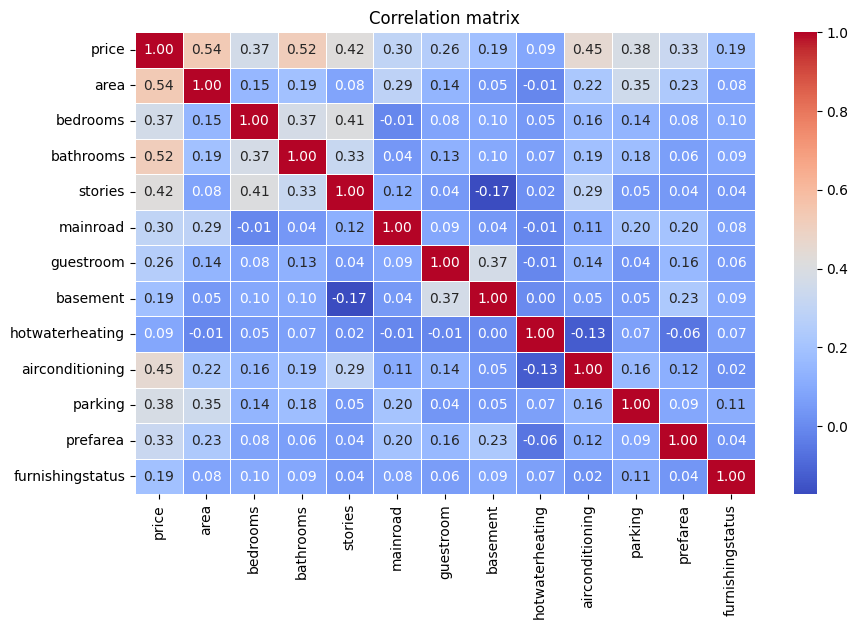

In [25]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation matrix")
plt.show()

`area` and `bathrooms` are the features that have higher linear correlation.

In [28]:
# Mutual information: for cat and non linear correlation
mi_scores = mutual_info_regression(df.drop(columns=['price']), df['price'])
mi_series = pd.Series(mi_scores, index=df.drop(columns=['price']).columns).sort_values(ascending=False)

print("\nMutual Information Feature-Target:\n", mi_series)


Mutual Information Feature-Target:
 area                0.275980
bathrooms           0.136854
parking             0.136813
stories             0.133410
furnishingstatus    0.126363
airconditioning     0.111895
bedrooms            0.105834
mainroad            0.098681
prefarea            0.082814
guestroom           0.073258
basement            0.025456
hotwaterheating     0.007178
dtype: float64


`area` seems to be the most predictive feature.

# Regression Models

In [32]:
X = df.drop('price', axis=1)
y = df['price']

In [35]:
# training set (80%), test set (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [38]:
# Possible alpha values
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

# RidgeCV 5 fold
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train, y_train)
print("\nRidgeCV: Best alpha:", ridge_cv.alpha_)

# LassoCV 5 fold
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42)
lasso_cv.fit(X_train, y_train)
print("LassoCV: Best alpha:", lasso_cv.alpha_)

# ElasticNetCV 5 fold
elastic_cv = ElasticNetCV(alphas=alphas, l1_ratio=[0.1, 0.5, 0.7, 0.9, 1], cv=5, random_state=42)
elastic_cv.fit(X_train, y_train)
print("ElasticNetCV: Best alpha:", elastic_cv.alpha_)
print("ElasticNetCV: Best l1_ratio:", elastic_cv.l1_ratio_)


RidgeCV: Best alpha: 10.0
LassoCV: Best alpha: 10.0
ElasticNetCV: Best alpha: 0.1
ElasticNetCV: Best l1_ratio: 0.9


## Evaluation

In [53]:
# Predict for each model
y_pred_ridge = ridge_cv.predict(X_test)
y_pred_lasso = lasso_cv.predict(X_test)
y_pred_elastic = elastic_cv.predict(X_test)

# Mean Squared Error (MSE) for each model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_elastic = mean_squared_error(y_test, y_pred_elastic)

print("\nMean Squared Error (MSE) test set:")
print("RidgeCV MSE: {:.4f}".format(mse_ridge))
print("LassoCV MSE: {:.4f}".format(mse_lasso))
print("ElasticNetCV MSE: {:.4f}".format(mse_elastic))

# Root Mean Squared Error (RMSE) for each model
rmse_ridge = np.sqrt(mse_ridge)
rmse_lasso = np.sqrt(mse_lasso)
rmse_elastic = np.sqrt(mse_elastic)

print("\nRoot Mean Squared Error (RMSE) test set")
print("RidgeCV  RMSE: {:.4f}".format(rmse_ridge))
print("LassoCV  RMSE: {:.4f}".format(rmse_lasso))
print("ElasticNetCV RMSE: {:.4f}".format(rmse_elastic))


Mean Squared Error (MSE) test set:
RidgeCV MSE: 1786397768616.2703
LassoCV MSE: 1747799408199.7446
ElasticNetCV MSE: 1765799273493.3489

Root Mean Squared Error (RMSE) test set
RidgeCV  RMSE: 1336561.9210
LassoCV  RMSE: 1322043.6484
ElasticNetCV RMSE: 1328833.8021


**LassoCV seems to be the best model among the three.**

## Non null coeffs

In [45]:
ridge_nonzero = np.sum(ridge_cv.coef_ != 0)
lasso_nonzero = np.sum(lasso_cv.coef_ != 0)
elastic_nonzero = np.sum(elastic_cv.coef_ != 0)

print("\n# of coeffs non null:")
print("RidgeCV: {} su {}".format(ridge_nonzero, len(ridge_cv.coef_)))
print("LassoCV: {} su {}".format(lasso_nonzero, len(lasso_cv.coef_)))
print("ElasticNetCV: {} su {}".format(elastic_nonzero, len(elastic_cv.coef_)))


# of coeffs non null:
RidgeCV: 12 su 12
LassoCV: 12 su 12
ElasticNetCV: 12 su 12


**Ridge**

Ridge shrinks coefficients but does not truly force them to zero.

**Lasso & ElasticNet**

Lasso and ElasticNet can drive some coefficients to zero. However, this only happens if the alpha (and for ElasticNet, the l1_ratio) is large enough.

If the cross-validation finds a small alpha that minimizes the error, the penalty may not be strong enough to eliminate any features.

## Residuals distributions

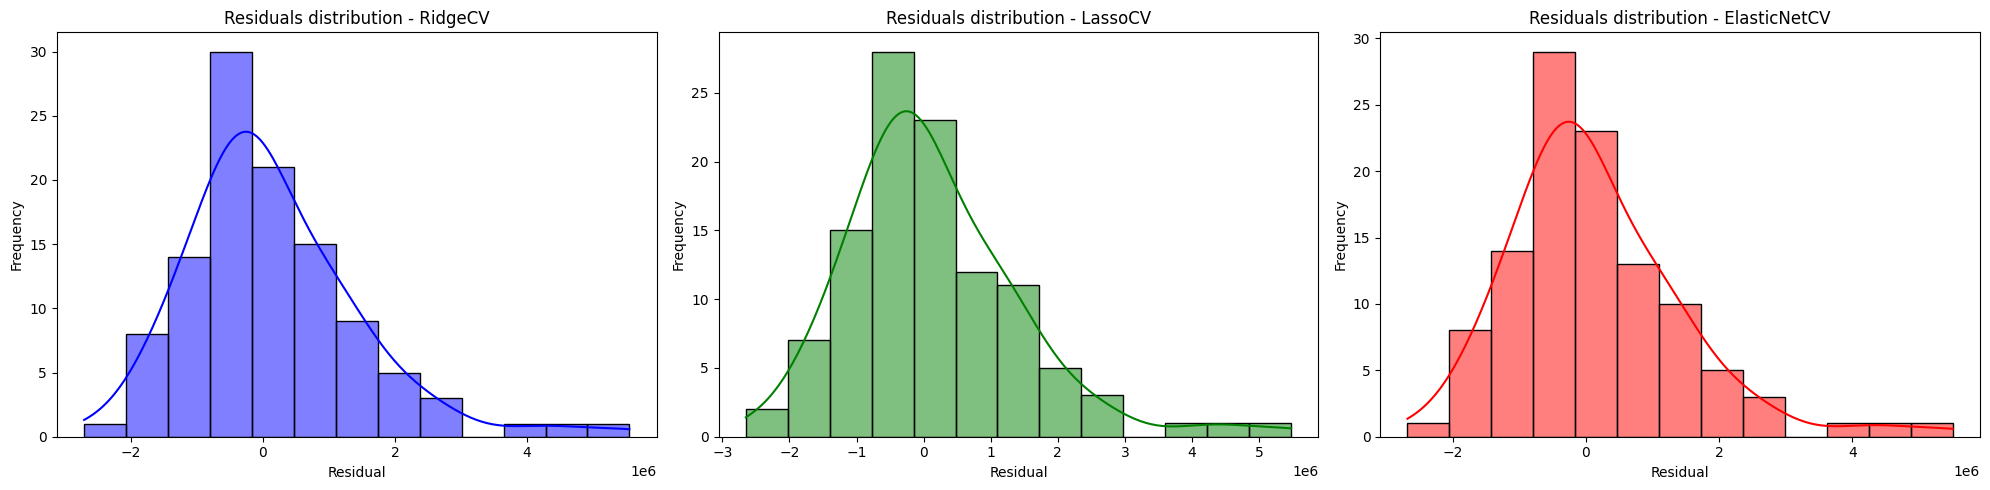

In [49]:
# Residuals calculus for each model
resid_ridge = y_test - y_pred_ridge
resid_lasso = y_test - y_pred_lasso
resid_elastic = y_test - y_pred_elastic

# 3 subplot
fig, axes = plt.subplots(ncols=3, figsize=(20, 5))

# RidgeCV
sns.histplot(resid_ridge, kde=True, ax=axes[0], color='blue')
axes[0].set_title("Residuals distribution - RidgeCV")
axes[0].set_xlabel("Residual")
axes[0].set_ylabel("Frequency")

# LassoCV
sns.histplot(resid_lasso, kde=True, ax=axes[1], color='green')
axes[1].set_title("Residuals distribution - LassoCV")
axes[1].set_xlabel("Residual")
axes[1].set_ylabel("Frequency")

# ElasticNetCV
sns.histplot(resid_elastic, kde=True, ax=axes[2], color='red')
axes[2].set_title("Residuals distribution - ElasticNetCV")
axes[2].set_xlabel("Residual")
axes[2].set_ylabel("Frequency")

# Improve layout
plt.tight_layout()
plt.show()

All three models have residuals that are mostly centered around zero but display a noticeable right tail, suggesting they tend to underestimate higher-priced properties. The distributions are not perfectly symmetrical, which is fairly common in real estate price predictions.